In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) # If any of my package is outdated.


In [2]:
df = pd.read_csv('Skyserver.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df.shape

(10000, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
df.describe() # with domain knowledge this is usefull

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [6]:
df['class'].value_counts()

class
GALAXY    4998
STAR      4152
QSO        850
Name: count, dtype: int64

In [7]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [8]:
df.drop(['objid' , 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis =1, inplace=True)

In [9]:
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922,512


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10312\434761833.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['class']== 'STAR'].redshift, bins = 30, ax = axes[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10312\434761833.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(

Text(0.5, 1.0, 'Quasor')

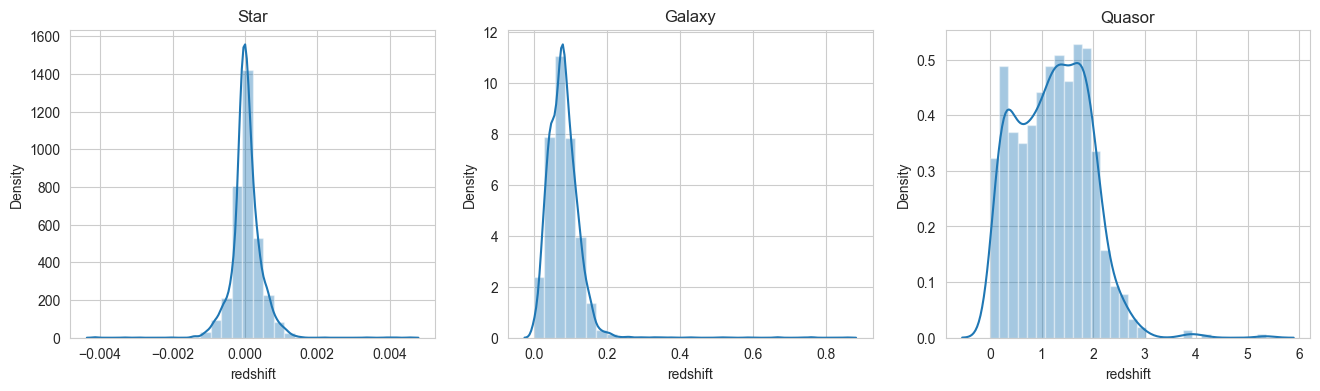

In [10]:
fig, axes = plt.subplots(1,3, figsize = (16,4))
ax = sns.distplot(df[df['class']== 'STAR'].redshift, bins = 30, ax = axes[0])
ax.set_title('Star')
ax = sns.distplot(df[df['class']== 'GALAXY'].redshift, bins = 30, ax = axes[1])
ax.set_title('Galaxy')
ax = sns.distplot(df[df['class']== 'QSO'].redshift, bins = 30, ax = axes[2])
ax.set_title('Quasor')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10312\2199337272.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df['class'], y=df['dec'], palette = 'coolwarm')


Text(0.5, 1.0, 'dec')

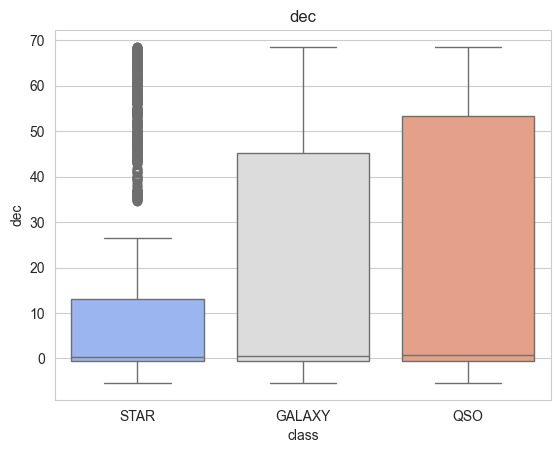

In [11]:
ax = sns.boxplot(x=df['class'], y=df['dec'], palette = 'coolwarm')
ax.set_title('dec')

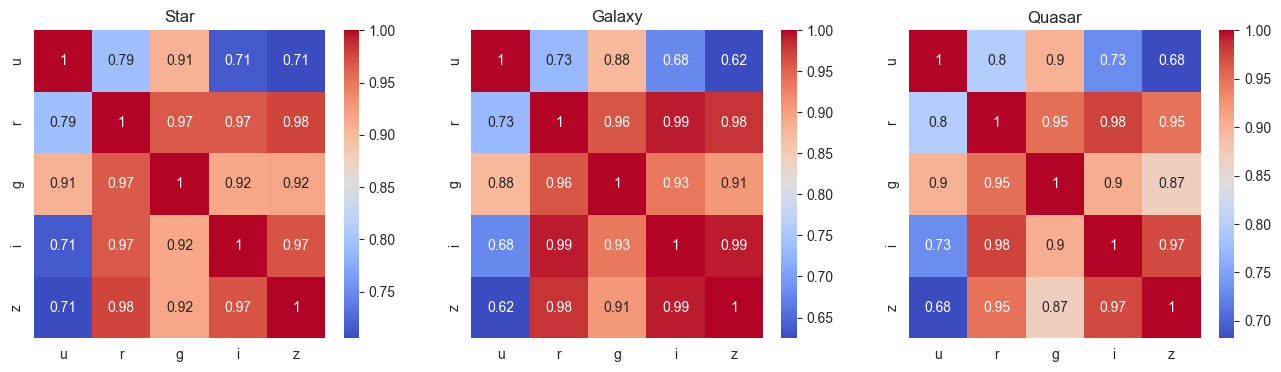

In [12]:
# u g r i z represent what?


fig, axes = plt.subplots(1,3, figsize=(16,4))
fig.set_dpi(100)
ax = sns.heatmap(df[df['class']=='STAR'][['u','r','g','i', 'z']].corr(), ax = axes[0], cmap = 'coolwarm', annot = True)
ax = ax.set_title('Star')
ax = sns.heatmap(df[df['class']=='GALAXY'][['u','r','g','i', 'z']].corr(), ax = axes[1], cmap = 'coolwarm',annot = True)
ax = ax.set_title('Galaxy')
ax = sns.heatmap(df[df['class']=='QSO'][['u','r','g','i', 'z']].corr(), ax = axes[2], cmap = 'coolwarm',annot = True)
ax = ax.set_title('Quasar')

Text(0.5, 1.0, 'Equatorial Co-ordinates')

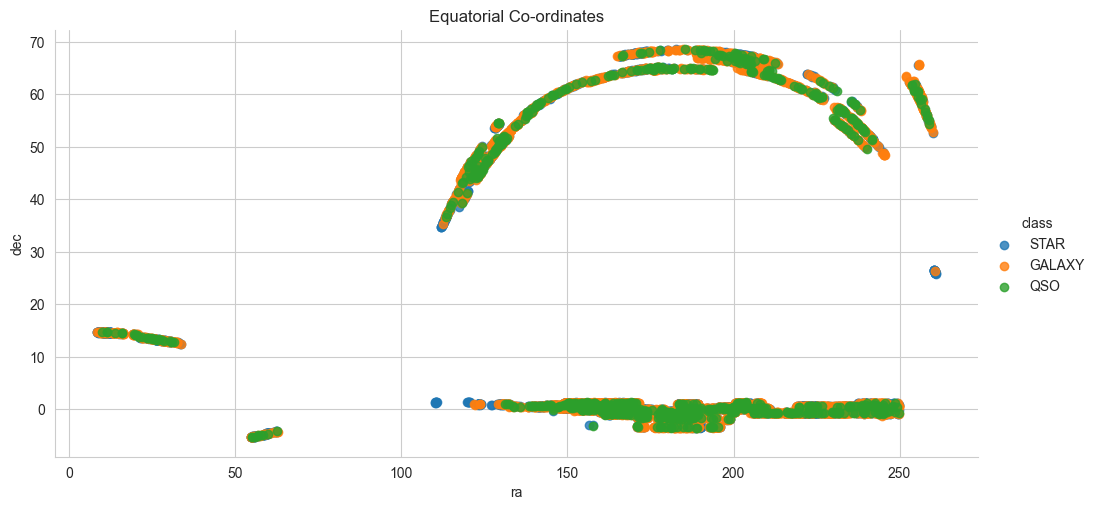

In [13]:
sns.lmplot(x = 'ra', y = 'dec', data = df, hue = 'class', fit_reg=False, aspect = 2)
plt.title('Equatorial Co-ordinates')

In [14]:
df_encode = df.copy()

In [15]:
mapp = {'STAR':0, 'GALAXY':1, 'QSO':2}
df_encode['class'] = df_encode['class'].map(mapp)

In [16]:
pca = PCA(n_components=3)
ugriz = pca.fit_transform(df_encode[['u','r','g','i', 'z']])

ugriz

array([[-1.50720246e+00,  1.37729303e+00, -2.65118562e-01],
       [-1.95757561e-01,  2.84104723e-02, -1.55695489e-01],
       [ 1.29760442e+00,  5.90023138e-01,  1.40338453e-01],
       ...,
       [ 1.48072524e+00, -3.88717075e-01, -1.26646283e-01],
       [ 1.39208832e+00, -1.17003627e-01,  3.88182819e-02],
       [-9.36205074e-01,  1.11321472e+00, -1.12953950e-03]])

In [17]:
ugriz = pd.DataFrame(ugriz)
ugriz

,0,1,2
0,-1.507202,1.377293,-0.265119
1,-0.195758,0.028410,-0.155695
2,1.297604,0.590023,0.140338
3,-1.446117,-0.566685,-0.009272
4,-0.849271,-1.287505,-0.397689
...,...,...,...
9995,0.222959,0.134301,-0.057857
9996,0.259171,-0.415333,0.158501
9997,1.480725,-0.388717,-0.126646
9998,1.392088,-0.117004,0.038818


In [18]:
df_encode = pd.concat([df_encode, ugriz], axis=1)
df_encode

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid,0,1,2
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,0,-0.000009,3306,54922,491,-1.507202,1.377293,-0.265119
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,0,-0.000055,323,51615,541,-0.195758,0.028410,-0.155695
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,1,0.123111,287,52023,513,1.297604,0.590023,0.140338
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,0,-0.000111,3306,54922,510,-1.446117,-0.566685,-0.009272
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0,0.000590,3306,54922,512,-0.849271,-1.287505,-0.397689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1,0.027583,447,51877,246,0.222959,0.134301,-0.057857
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1,0.117772,447,51877,228,0.259171,-0.415333,0.158501
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,0,-0.000402,7303,57013,622,1.480725,-0.388717,-0.126646
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1,0.014019,447,51877,229,1.392088,-0.117004,0.038818


In [19]:

df_encode.rename({0:'PCA1', 1:'PCA2', 2: 'PCA3'}, axis=1, inplace=True)
df_encode.drop(['u','r','g','i', 'z'], axis = 1, inplace = True)
df_encode.head()

,ra,dec,class,redshift,plate,mjd,fiberid,PCA1,PCA2,PCA3
0,183.531326,0.089693,0,-0.000009,3306,54922,491,-1.507202,1.377293,-0.265119
1,183.598370,0.135285,0,-0.000055,323,51615,541,-0.195758,0.028410,-0.155695
2,183.680207,0.126185,1,0.123111,287,52023,513,1.297604,0.590023,0.140338
3,183.870529,0.049911,0,-0.000111,3306,54922,510,-1.446117,-0.566685,-0.009272
4,183.883288,0.102557,0,0.000590,3306,54922,512,-0.849271,-1.287505,-0.397689


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
sdss = scaler.fit_transform(df_encode.drop('class', axis = 1))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(sdss, df_encode['class'], test_size=0.3, random_state=42)

In [23]:
X_train.shape

(7000, 9)

# Logistic Regression

In [24]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def eval_model(y_train, y_train_pred, y_test, y_test_pred):
    print('Evaluation on Train data: ')
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print('*'*50)
    print('Evaluation on Test data: ')
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))




In [25]:
import time

start_train = time.time()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
end_train = time.time()

logreg_train = end_train-start_train
print('Training time', round(logreg_train, 2) )

pred = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, pred) * 100

print('Accuracy Score', round(accuracy_logreg,2), '%')

Training time 0.36
Accuracy Score 91.57 %


In [26]:
train_pred = logreg.predict(X_train)
eval_model(y_train, train_pred, y_test, pred)

Evaluation on Train data: 
[[2629  301    5]
 [ 162 3331    8]
 [  18   80  466]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2935
           1       0.90      0.95      0.92      3501
           2       0.97      0.83      0.89       564

    accuracy                           0.92      7000
   macro avg       0.94      0.89      0.91      7000
weighted avg       0.92      0.92      0.92      7000

**************************************************
Evaluation on Test data: 
[[1073  142    2]
 [  70 1427    0]
 [   9   30  247]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1217
           1       0.89      0.95      0.92      1497
           2       0.99      0.86      0.92       286

    accuracy                           0.92      3000
   macro avg       0.94      0.90      0.92      3000
weighted avg       0.92      0.92      0.92      3000



# KNN Algorithm

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:


start_train = time.time()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
end_train = time.time()

neigh_train = end_train-start_train
print('Training time', round(neigh_train, 2) )

pred = neigh.predict(X_test)
accuracy_neigh = accuracy_score(y_test, pred) * 100

print('Accuracy Score', round(accuracy_neigh,2), '%')

Training time 0.25
Accuracy Score 93.63 %


In [29]:
from sklearn.naive_bayes import GaussianNB

start_train = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
end_train = time.time()

gnb_train = end_train-start_train
print('Training time', round(gnb_train, 4) )

pred = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, pred) * 100

print('Accuracy Score', round(accuracy_gnb,2), '%')


Training time 0.002
Accuracy Score 98.0 %


In [30]:
train_pred = gnb.predict(X_train)
eval_model(y_train, train_pred, y_test, pred)

Evaluation on Train data: 
[[2904   17   14]
 [  14 3391   96]
 [   1   28  535]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2935
           1       0.99      0.97      0.98      3501
           2       0.83      0.95      0.89       564

    accuracy                           0.98      7000
   macro avg       0.94      0.97      0.95      7000
weighted avg       0.98      0.98      0.98      7000

**************************************************
Evaluation on Test data: 
[[1208    3    6]
 [   8 1456   33]
 [   0   10  276]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1217
           1       0.99      0.97      0.98      1497
           2       0.88      0.97      0.92       286

    accuracy                           0.98      3000
   macro avg       0.95      0.98      0.96      3000
weighted avg       0.98      0.98      0.98      3000



## BAGGING 

### RANDOM FOREST ALGORITHM

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


start_train = time.time()
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
end_train = time.time()

rfc_train = end_train-start_train
print('Training time', round(rfc_train, 4) )

pred = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, pred) * 100

print('Accuracy Score', round(accuracy_rfc,2), '%')

Training time 1.6528
Accuracy Score 99.27 %


In [32]:
train_pred = rfc.predict(X_train)
eval_model(y_train, train_pred, y_test, pred)

Evaluation on Train data: 
[[2935    0    0]
 [   0 3501    0]
 [   0    0  564]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2935
           1       1.00      1.00      1.00      3501
           2       1.00      1.00      1.00       564

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

**************************************************
Evaluation on Test data: 
[[1215    2    0]
 [   8 1484    5]
 [   0    7  279]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1217
           1       0.99      0.99      0.99      1497
           2       0.98      0.98      0.98       286

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



# XG-BOOST ALGORITHM

In [33]:
!pip install xgboost

In [34]:
from xgboost import XGBClassifier

start_train = time.time()
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
end_train = time.time()

xgb_train = end_train-start_train
print('Training time', round(xgb_train, 4) )

pred = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, pred) * 100

print('Accuracy Score', round(accuracy_xgb,2), '%')

Training time 0.3551
Accuracy Score 99.37 %


In [35]:
train_pred = xgb.predict(X_train)
eval_model(y_train, train_pred, y_test, pred)

Evaluation on Train data: 
[[2935    0    0]
 [   0 3501    0]
 [   0    0  564]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2935
           1       1.00      1.00      1.00      3501
           2       1.00      1.00      1.00       564

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

**************************************************
Evaluation on Test data: 
[[1216    1    0]
 [   7 1484    6]
 [   0    5  281]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1217
           1       1.00      0.99      0.99      1497
           2       0.98      0.98      0.98       286

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



## SUPPORT VECTOR MACHINEs

In [36]:
from sklearn.svm import SVC


start_train = time.time()
clf = SVC()
clf.fit(X_train, y_train)
end_train = time.time()

clf_train = end_train-start_train
print('Training time', round(clf_train, 4) )

pred = clf.predict(X_test)
accuracy_clf = accuracy_score(y_test, pred) * 100

print('Accuracy Score', round(accuracy_clf,2), '%')

Training time 0.6431
Accuracy Score 94.5 %


In [37]:
train_pred = clf.predict(X_train)
eval_model(y_train, train_pred, y_test, pred)

Evaluation on Train data: 
[[2712  214    9]
 [ 111 3381    9]
 [  11   28  525]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2935
           1       0.93      0.97      0.95      3501
           2       0.97      0.93      0.95       564

    accuracy                           0.95      7000
   macro avg       0.95      0.94      0.95      7000
weighted avg       0.95      0.95      0.95      7000

**************************************************
Evaluation on Test data: 
[[1123   89    5]
 [  51 1444    2]
 [   5   13  268]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1217
           1       0.93      0.96      0.95      1497
           2       0.97      0.94      0.96       286

    accuracy                           0.94      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.95      0.94      0.94      3000



In [38]:
dictt = {
    'Model' : ['logreg', 'K-NN', 'Naive Bayes', 'Random Forest', 'XGB', 'SVM'],
    'Score' : [accuracy_logreg, accuracy_neigh, accuracy_gnb, accuracy_rfc, accuracy_xgb, accuracy_clf],
    'Train_Time' : [logreg_train, neigh_train, gnb_train, rfc_train, xgb_train, clf_train]
}

results_df = pd.DataFrame(dictt)
results_df = results_df.sort_values(by = 'Score', ascending=False)
results_df = results_df.set_index('Model')
results_df

,Score,Train_Time
Model,,
XGB,99.366667,0.355110
Random Forest,99.266667,1.652825
Naive Bayes,98.000000,0.001996
SVM,94.500000,0.643121
K-NN,93.633333,0.251627
logreg,91.566667,0.362430


## XGB IS MORE ACCURATE while NAIVE BAYES is the FASTEST in this case.

### Cross validation: Model Selection: Criteria: Accuracy Score and Training Time -----> Best Accuracy at Optimum Time we chose that model.

#### Accuracy -- Highest Accuracy

#### Testing Time to the Testing Inference Time --> Inference time is low you can choose that model too.

#### Why your model production Inference time important --> Because AWS, AZURE --> cloud platform has pricing based on hours --> AWS EC2 instance is 0.00002$ to $12/hr.

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
xgb_cv = XGBClassifier(n_estimators = 100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print('Mean: ', scores.mean())
print('Standard Deviation: ', scores.std())

[0.99142857 0.99       0.98714286 0.99285714 0.99142857 0.99714286
 0.99285714 0.99285714 0.99       0.99571429]
Mean:  0.9921428571428571
Standard Deviation:  0.002729281882077541


In [41]:
rfc_cv = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print('Mean: ', scores.mean())
print('Standard Deviation: ', scores.std())

[0.99285714 0.98857143 0.98714286 0.99285714 0.99142857 0.99571429
 0.99       0.99285714 0.98857143 0.99571429]
Mean:  0.9915714285714285
Standard Deviation:  0.0028175832747594325


In [42]:
gnb_cv = GaussianNB()
scores = cross_val_score(gnb_cv, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print('Mean: ', scores.mean())
print('Standard Deviation: ', scores.std())

[0.97285714 0.97857143 0.97       0.97571429 0.97857143 0.97285714
 0.97       0.98571429 0.97       0.98142857]
Mean:  0.9755714285714288
Standard Deviation:  0.005128949448861797


### FEATURE IMPORTANCE:

In [43]:
# XGBOOST --> inbuilt algorithm

importances = pd.DataFrame({'Feature': df_encode.drop('class', axis=1).columns,
                           'Importance': xgb.feature_importances_})

In [44]:
importances = importances.sort_values(by = 'Importance', ascending = False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
redshift,0.929004
PCA3,0.020943
PCA2,0.011668
plate,0.007551
PCA1,0.007349
mjd,0.006594
fiberid,0.006096
ra,0.005515
dec,0.005280


<Axes: xlabel='Feature'>

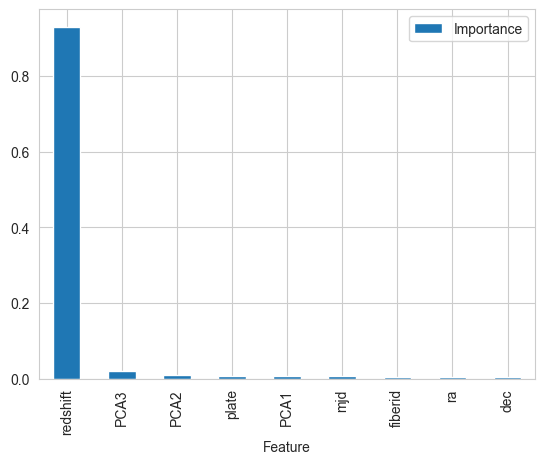

In [45]:
importances.plot.bar()